<a href="https://colab.research.google.com/github/durga0727/Data_Science_Project/blob/main/durga_rao_code_final_file1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import shap
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


plt.style.use('seaborn-v0_8-deep')
sns.set_palette('Set2')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
url = "https://data.ny.gov/api/views/e8ky-4vqe/rows.json?accessType=DOWNLOAD"
response = requests.get(url)
data = response.json()

columns = data['meta']['view']['columns']
column_names = [col['name'] for col in columns]

df = pd.DataFrame(data['data'], columns=column_names)


In [ ]:
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Year,Crash Descriptor,...,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,row-wgtt_5huv.kqs6,00000000-0000-0000-2796-E55D840263B4,0,1731535520,None,1731535520,None,{ },2019,Property Damage Accident,...,OTHER,MONROE,Curve and Level,Rain,None,Wet,None,Not Applicable,"Fence, Collision With Fixed Object",1
1,row-xh7p.bt42.z62k,00000000-0000-0000-B82C-94E44800C659,0,1731535520,None,1731535520,None,{ },2019,Property Damage Accident,...,OTHER,MONROE,Straight and Level,Clear,None,Dry,None,Not Applicable,Deer,1
2,row-b3gy~kuuf_2y4u,00000000-0000-0000-15E7-ACAB0D74B3F1,0,1731535520,None,1731535520,None,{ },2019,Injury Accident,...,OTHER,QUEENS,Straight and Level,Clear,None,Dry,None,Not Applicable,"Other Motor Vehicle, Collision With",3
3,row-n7sg_y5ux.hea5,00000000-0000-0000-DB20-FA17EF43FEBE,0,1731535520,None,1731535520,None,{ },2019,Injury Accident,...,OVERTAKING,BRONX,Straight and Level,Clear,Traffic Signal,Dry,None,Not Applicable,"Other Motor Vehicle, Collision With",2
4,row-uicm-7ggp_bayx,00000000-0000-0000-CED5-B87B04B111D4,0,1731535520,None,1731535520,None,{ },2019,Property Damage Accident,...,OTHER,SULLIVAN,Straight and Grade,Clear,Stop Sign,Dry,None,Not Applicable,"Tree, Collision With Fixed Object",1


In [ ]:
df.shape

(1918715, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918715 entries, 0 to 1918714
Data columns (total 26 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   sid                            object
 1   id                             object
 2   position                       int64 
 3   created_at                     int64 
 4   created_meta                   object
 5   updated_at                     int64 
 6   updated_meta                   object
 7   meta                           object
 8   Year                           object
 9   Crash Descriptor               object
 10  Time                           object
 11  Date                           object
 12  Day of Week                    object
 13  Police Report                  object
 14  Lighting Conditions            object
 15  Municipality                   object
 16  Collision Type Descriptor      object
 17  County Name                    object
 18  Road Descriptor       

In [ ]:
df.describe()

,position,created_at,updated_at
count,1918715.0,1.918715e+06,1.918715e+06
mean,0.0,1.731536e+09,1.731536e+09
std,0.0,0.000000e+00,0.000000e+00
min,0.0,1.731536e+09,1.731536e+09
25%,0.0,1.731536e+09,1.731536e+09
50%,0.0,1.731536e+09,1.731536e+09
75%,0.0,1.731536e+09,1.731536e+09
max,0.0,1.731536e+09,1.731536e+09


In [ ]:
df.isnull().sum()

,0
sid,0
id,0
position,0
created_at,0
created_meta,1918715
updated_at,0
updated_meta,1918715
meta,0
Year,0
Crash Descriptor,0


In [ ]:
df = df.drop(columns=['sid', 'id', 'created_at', 'created_meta', 'updated_at',
                      'updated_meta', 'meta', 'Police Report', 'DOT Reference Marker Location'])

In [ ]:
df.isnull().sum()

,0
position,0
Year,0
Crash Descriptor,0
Time,0
Date,0
Day of Week,0
Lighting Conditions,0
Municipality,10356
Collision Type Descriptor,0
County Name,0


In [ ]:
mode_value = df['Municipality'].mode()[0]
df['Municipality'] = df['Municipality'].fillna(mode_value)

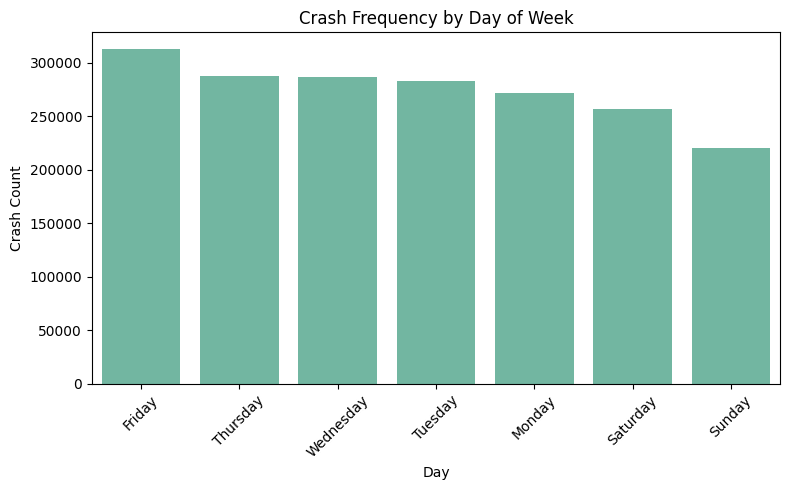

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Day of Week', order=df['Day of Week'].value_counts().index)
plt.title('Crash Frequency by Day of Week')
plt.ylabel('Crash Count')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


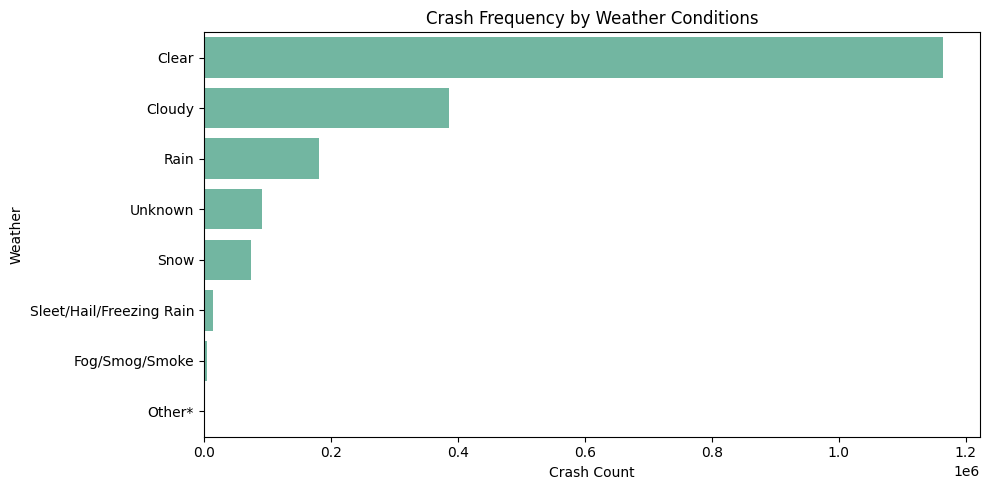

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Weather Conditions', order=df['Weather Conditions'].value_counts().index)
plt.title('Crash Frequency by Weather Conditions')
plt.xlabel('Crash Count')
plt.ylabel('Weather')
plt.tight_layout()
plt.show()


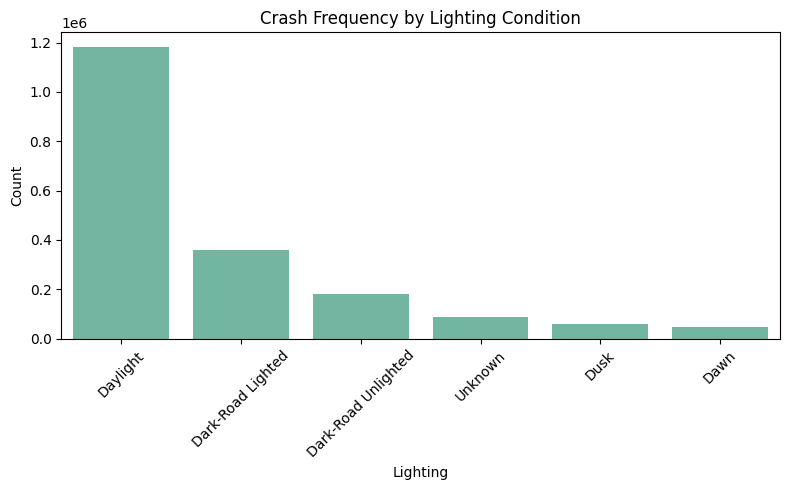

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Lighting Conditions', order=df['Lighting Conditions'].value_counts().index)
plt.title('Crash Frequency by Lighting Condition')
plt.xlabel('Lighting')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


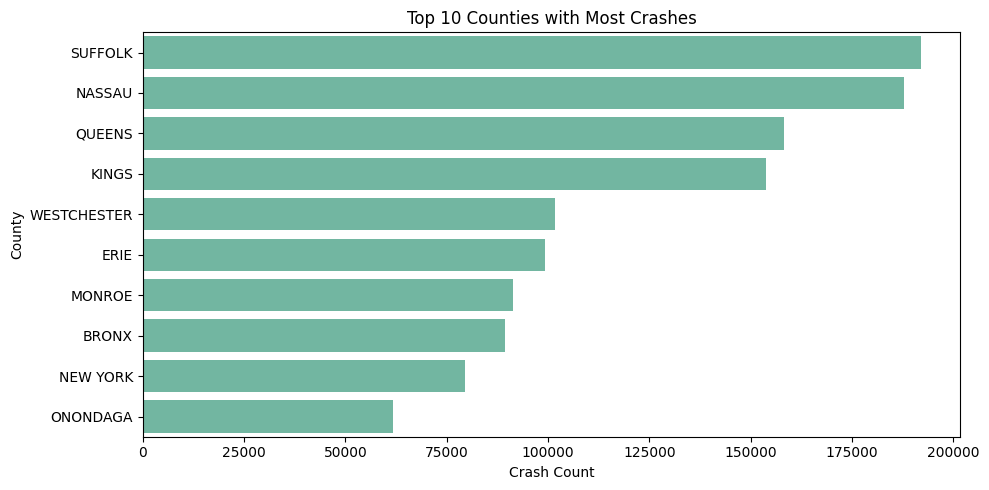

In [ ]:
plt.figure(figsize=(10, 5))
top_counties = df['County Name'].value_counts().head(10)
sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title('Top 10 Counties with Most Crashes')
plt.xlabel('Crash Count')
plt.ylabel('County')
plt.tight_layout()
plt.show()


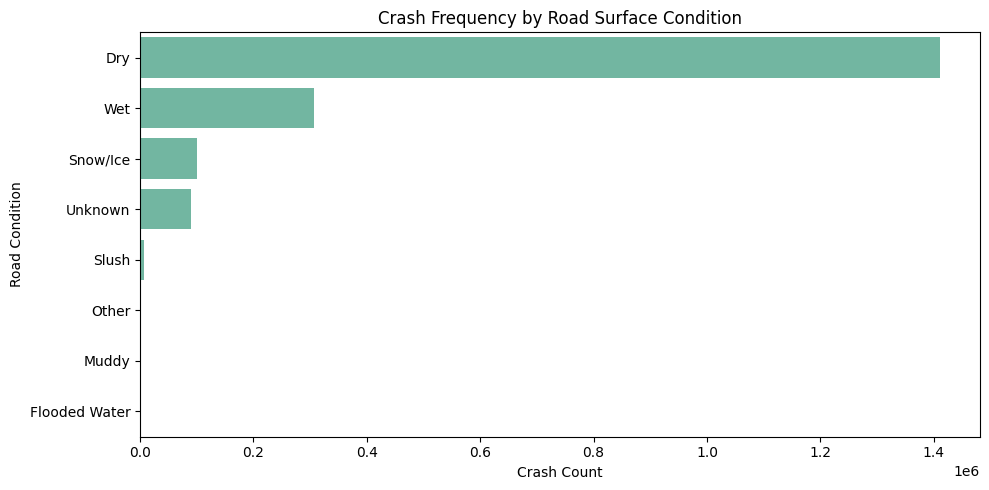

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Road Surface Conditions', order=df['Road Surface Conditions'].value_counts().index)
plt.title('Crash Frequency by Road Surface Condition')
plt.xlabel('Crash Count')
plt.ylabel('Road Condition')
plt.tight_layout()
plt.show()


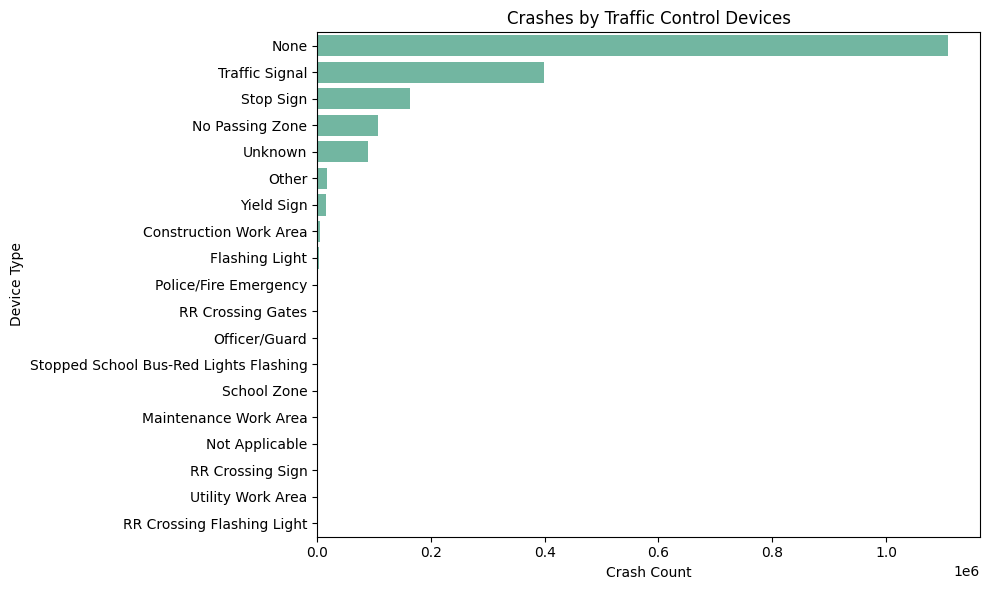

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Traffic Control Device', order=df['Traffic Control Device'].value_counts().index)
plt.title('Crashes by Traffic Control Devices')
plt.xlabel('Crash Count')
plt.ylabel('Device Type')
plt.tight_layout()
plt.show()


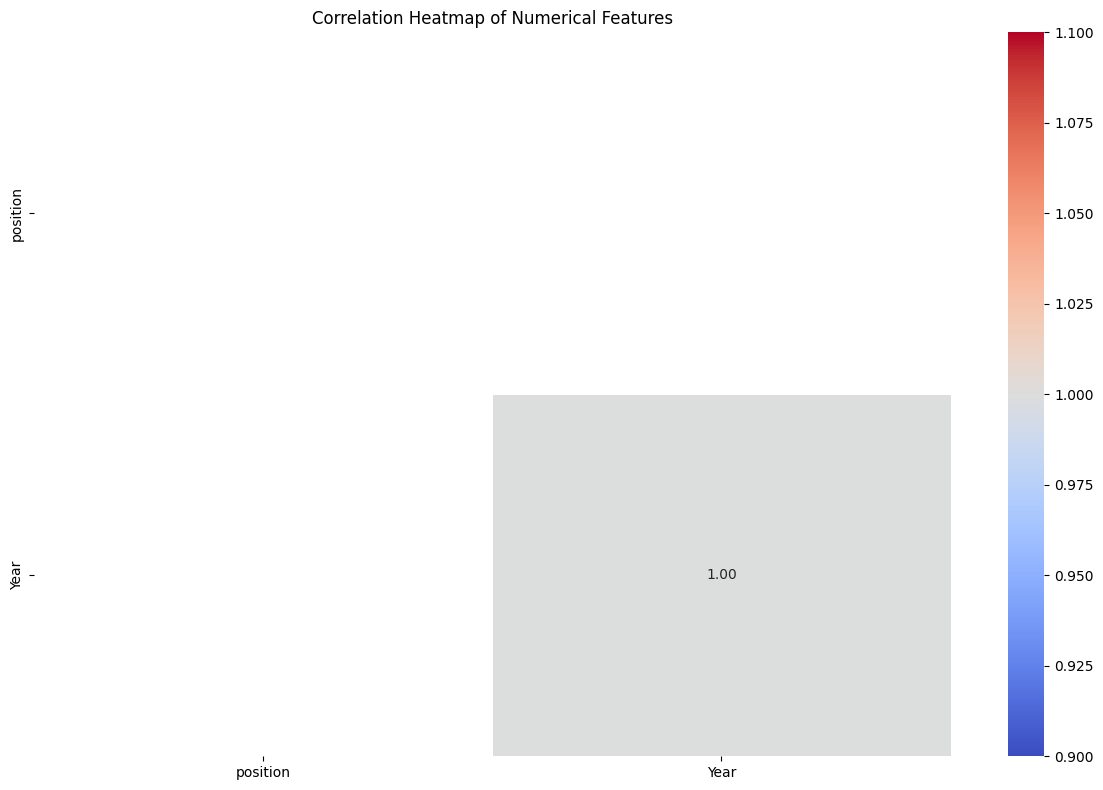

In [ ]:
numeric_df = df.copy()
numeric_df['Year'] = pd.to_numeric(numeric_df['Year'], errors='coerce')

plt.figure(figsize=(12, 8))
corr = numeric_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


In [ ]:

df['Number of Vehicles Involved'] = pd.to_numeric(df['Number of Vehicles Involved'], errors='coerce')
df['multi_vehicle'] = (df['Number of Vehicles Involved'] > 1).astype(int)

df = df.dropna(subset=['multi_vehicle'])

df = df.dropna()

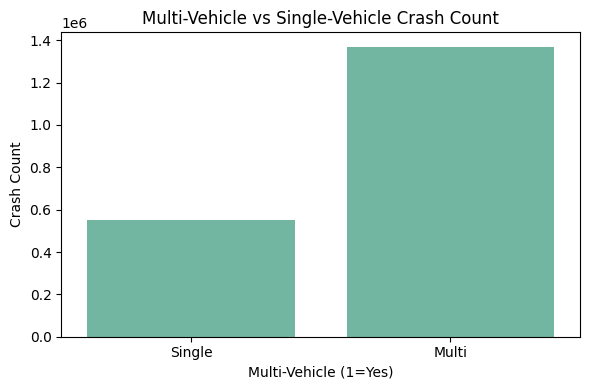

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='multi_vehicle', data=df)
plt.title('Multi-Vehicle vs Single-Vehicle Crash Count')
plt.xlabel('Multi-Vehicle (1=Yes)')
plt.ylabel('Crash Count')
plt.xticks([0, 1], ['Single', 'Multi'])
plt.tight_layout()
plt.show()


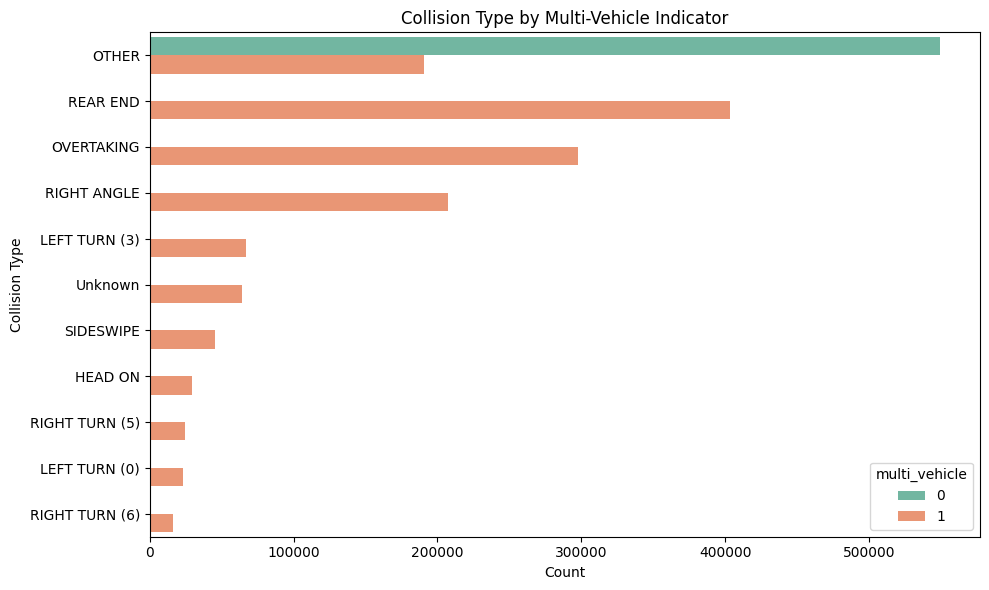

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Collision Type Descriptor', hue='multi_vehicle',
              order=df['Collision Type Descriptor'].value_counts().index)
plt.title('Collision Type by Multi-Vehicle Indicator')
plt.xlabel('Count')
plt.ylabel('Collision Type')
plt.tight_layout()
plt.show()


In [ ]:


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour


In [ ]:
categorical_cols = ['Crash Descriptor', 'Day of Week', 'Lighting Conditions', 'Municipality',
                    'Collision Type Descriptor', 'County Name', 'Road Descriptor', 'Weather Conditions',
                    'Traffic Control Device', 'Road Surface Conditions', 'Pedestrian Bicyclist Action', 'Event Descriptor']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])




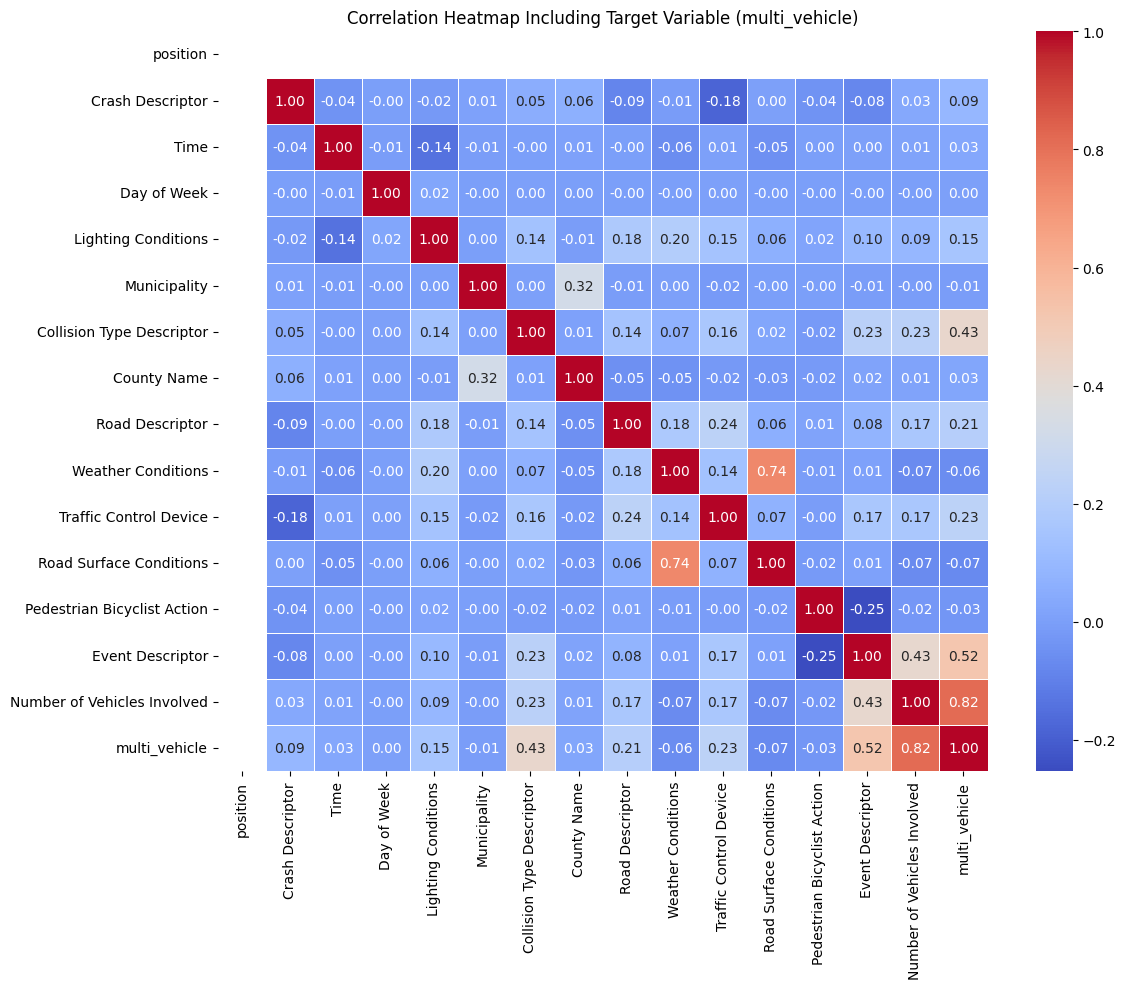

In [ ]:
correlation_df = df.copy()

correlation_df['multi_vehicle'] = pd.to_numeric(correlation_df['multi_vehicle'], errors='coerce')


numeric_df = correlation_df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Including Target Variable (multi_vehicle)')
plt.tight_layout()
plt.show()

In [ ]:
features = ['Year', 'Time', 'Crash Descriptor', 'Day of Week', 'Lighting Conditions', 'Municipality',
            'Collision Type Descriptor', 'County Name', 'Road Descriptor', 'Weather Conditions',
            'Traffic Control Device', 'Road Surface Conditions', 'Pedestrian Bicyclist Action', 'Event Descriptor']



In [ ]:
y = df['multi_vehicle']
X = df.drop(columns=['multi_vehicle', 'Number of Vehicles Involved'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

label_encoders = {}

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:



y = df['multi_vehicle']
X = df.drop(columns=['multi_vehicle', 'Number of Vehicles Involved'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])



X_subset, X_test, y_subset, y_test = train_test_split(
    X_train, y_train, train_size=200_000, stratify=y_train, random_state=42
)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_subset, y_subset)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


#### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
results = {}

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
results["Random Forest"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    382456
           1       1.00      1.00      1.00    952516

    accuracy                           1.00   1334972
   macro avg       0.99      1.00      1.00   1334972
weighted avg       1.00      1.00      1.00   1334972

Accuracy:  0.9968
Precision: 0.9999
Recall:    0.9957
ROC AUC:   0.5410


In [ ]:
y_scores_rf = rf.predict_proba(X_test_scaled)[:, 1]



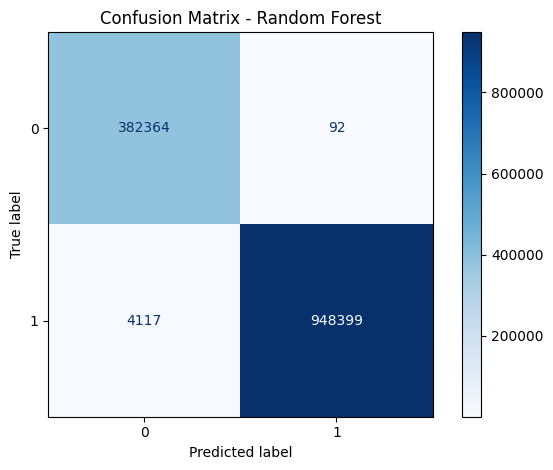

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

#### Prameter Tuning For Random Forest

In [ ]:

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)


grid_search.fit(X_train_scaled, y_train_resampled)

best_rf = grid_search.best_estimator_


y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf_best = best_rf.predict_proba(X_test_scaled)[:, 1]


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
tuning_results={}
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf_best)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
tuning_results["Random Forest"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    382456
           1       1.00      1.00      1.00    952516

    accuracy                           1.00   1334972
   macro avg       1.00      1.00      1.00   1334972
weighted avg       1.00      1.00      1.00   1334972

Accuracy:  0.9971
Precision: 1.0000
Recall:    0.9960
ROC AUC:   0.9989


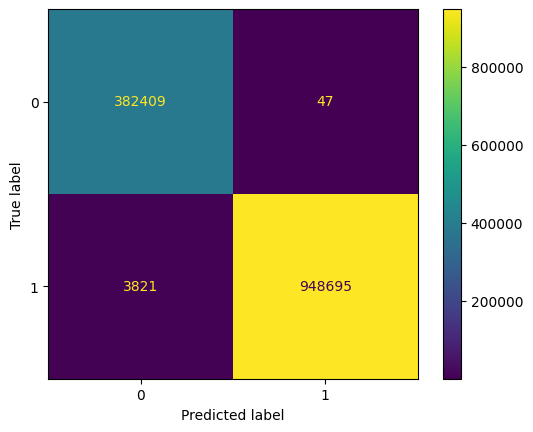

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)


#### XGBClassifier

In [ ]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
results["XGBoost"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    382456
           1       1.00      1.00      1.00    952516

    accuracy                           1.00   1334972
   macro avg       0.99      1.00      1.00   1334972
weighted avg       1.00      1.00      1.00   1334972

Accuracy:  0.9969
Precision: 0.9999
Recall:    0.9958
ROC AUC:   0.9991


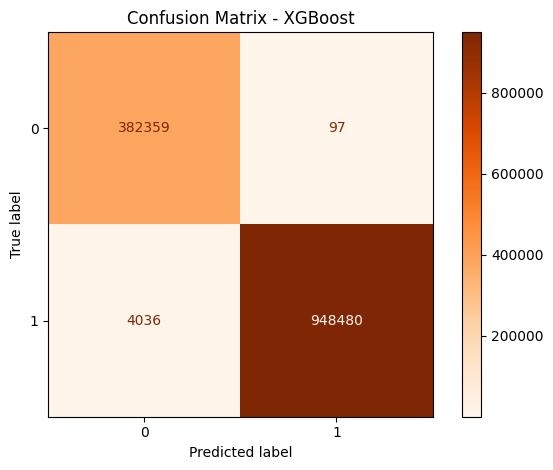

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()


#### Parameter Tuning For the XGBoost

In [ ]:

param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'gamma': [0, 0.1]
}


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train_resampled)


best_xgb = grid_search.best_estimator_


y_pred_xgb = best_xgb.predict(X_test_scaled)
y_proba_xgb_best = best_xgb.predict_proba(X_test_scaled)[:, 1]



Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:

print("Best Parameters:", grid_search.best_params_)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb_best)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

tuning_results["XGBoost"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    382456
           1       1.00      1.00      1.00    952516

    accuracy                           1.00   1334972
   macro avg       1.00      1.00      1.00   1334972
weighted avg       1.00      1.00      1.00   1334972

Accuracy:  0.9973
Precision: 0.9999
Recall:    0.9962
ROC AUC:   0.9991


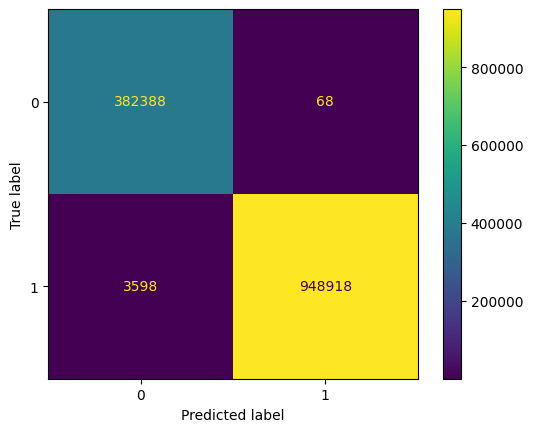

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test_scaled, y_test)


### Logistic Regression

In [ ]:

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train_resampled)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.4f}")
results["Logistic Regression"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75    382456
           1       0.93      0.84      0.88    952516

    accuracy                           0.84   1334972
   macro avg       0.81      0.84      0.82   1334972
weighted avg       0.86      0.84      0.85   1334972

Accuracy:  0.8431
Precision: 0.9290
Recall:    0.8446
ROC AUC:   0.9126


In [ ]:
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]


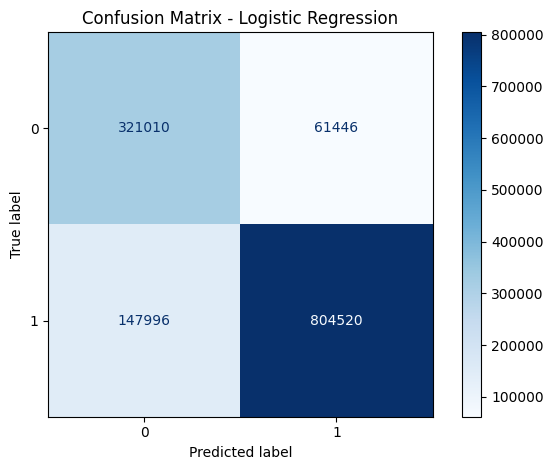

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

### parameter tuning for logistic regression

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}


lr = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)


best_lr = grid_search.best_estimator_
print("Best Logistic Regression Parameters:", grid_search.best_params_)


y_pred_lr = best_lr.predict(X_test_scaled)
y_proba_lr_best = best_lr.predict_proba(X_test_scaled)[:, 1]


Best Logistic Regression Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:

print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_proba_lr_best)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

tuning_results["Logistic Regression"] = {
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "ROC AUC": round(roc_auc, 4)
}


Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75    382456
           1       0.93      0.84      0.88    952516

    accuracy                           0.84   1334972
   macro avg       0.81      0.84      0.82   1334972
weighted avg       0.86      0.84      0.85   1334972

Accuracy:  0.8429
Precision: 0.9289
Recall:    0.8445
ROC AUC:   0.9126


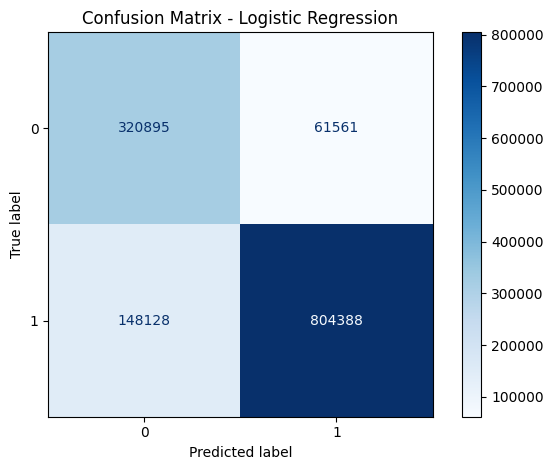

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

### DecisionTreeClassifier

In [ ]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_resampled)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1]):.4f}")
results["Decision Tree"] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    }

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    382456
           1       1.00      0.99      0.99    952516

    accuracy                           0.99   1334972
   macro avg       0.99      0.99      0.99   1334972
weighted avg       0.99      0.99      0.99   1334972

Accuracy:  0.9912
Precision: 0.9963
Recall:    0.9913
ROC AUC:   0.9911


In [ ]:
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]


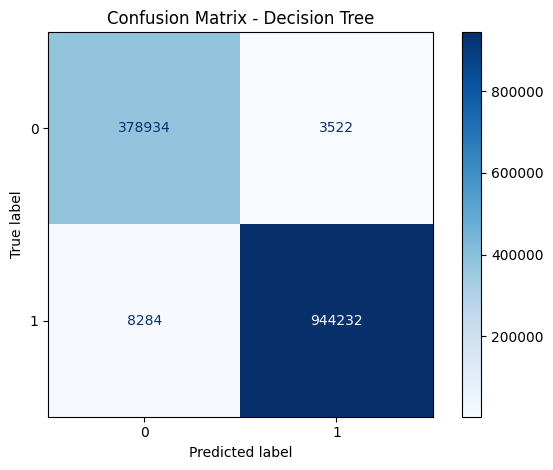

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

###  Parameter tuning for the DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

best_dt = grid_search.best_estimator_
print("Best Decision Tree Parameters:", grid_search.best_params_)

y_pred_dt = best_dt.predict(X_test_scaled)
y_proba_dt_best = best_dt.predict_proba(X_test_scaled)[:, 1]


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:

print("\n Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt_best)


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

tuning_results["Decision Tree"] = {
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "ROC AUC": round(roc_auc, 4)
}


 Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    382456
           1       1.00      1.00      1.00    952516

    accuracy                           1.00   1334972
   macro avg       0.99      1.00      1.00   1334972
weighted avg       1.00      1.00      1.00   1334972

Accuracy:  0.9967
Precision: 0.9999
Recall:    0.9954
ROC AUC:   0.9989


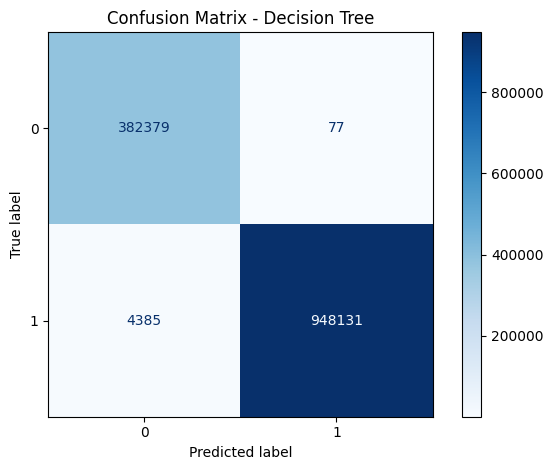

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

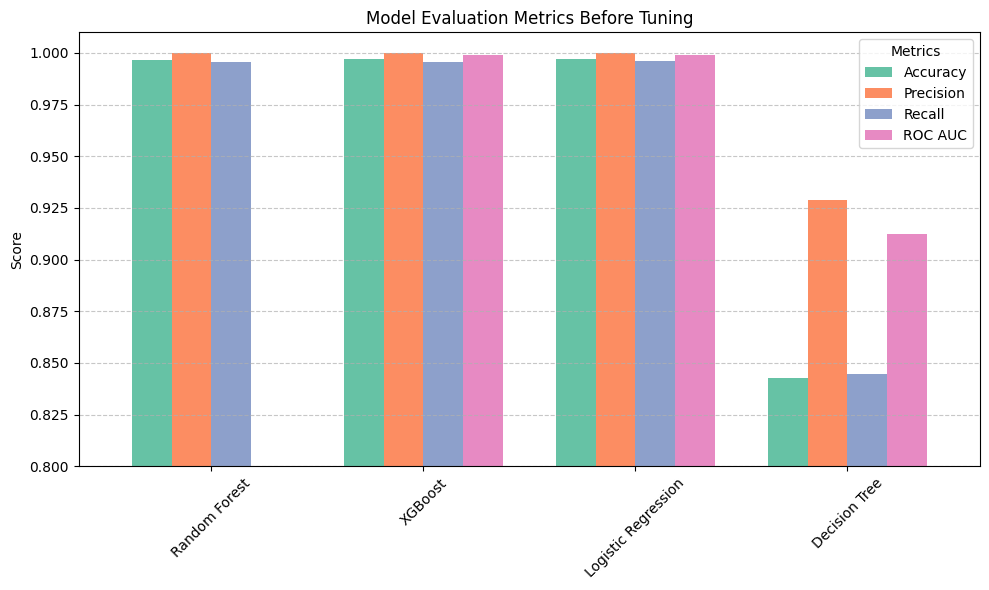

In [ ]:
results_df = pd.DataFrame(results).T

ax = results_df.plot(kind='bar', figsize=(10, 6), width=0.75)
plt.title("Model Evaluation Metrics Before Tuning")
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

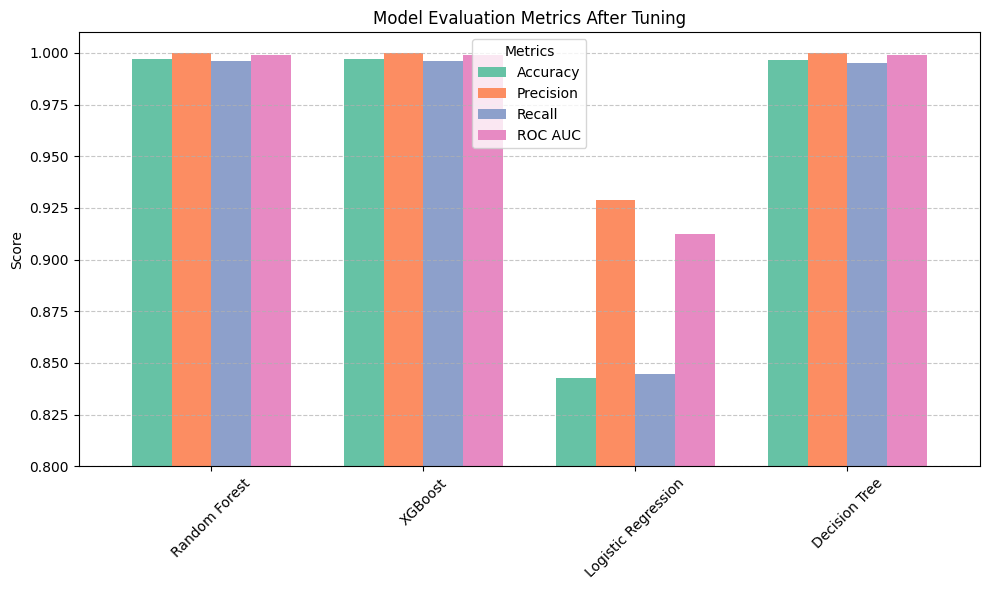

In [ ]:
tuning_df = pd.DataFrame(tuning_results).T

ax = tuning_df.plot(kind='bar', figsize=(10, 6), width=0.75)
plt.title("Model Evaluation Metrics After Tuning")
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

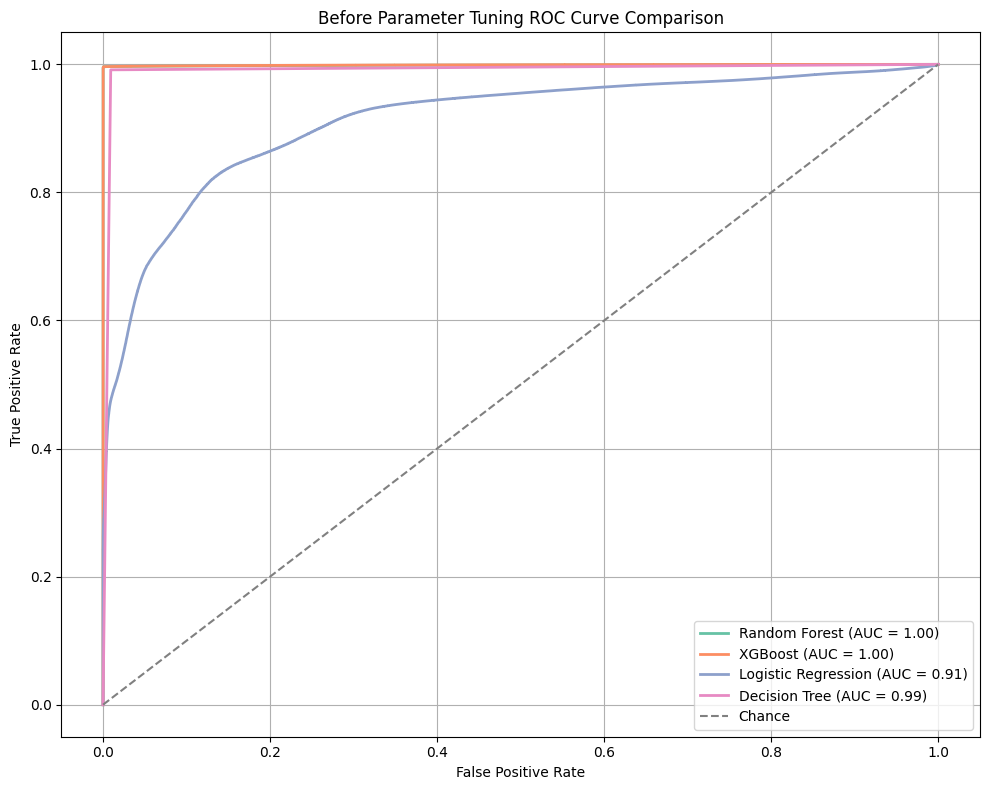

In [ ]:
model_probs = {
    'Random Forest': y_scores_rf,
    'XGBoost': y_proba_xgb,
    'Logistic Regression': y_proba_lr,
    'Decision Tree': y_proba_dt
}

plt.figure(figsize=(10, 8))

for model_name, y_proba in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')

plt.title('Before Parameter Tuning ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


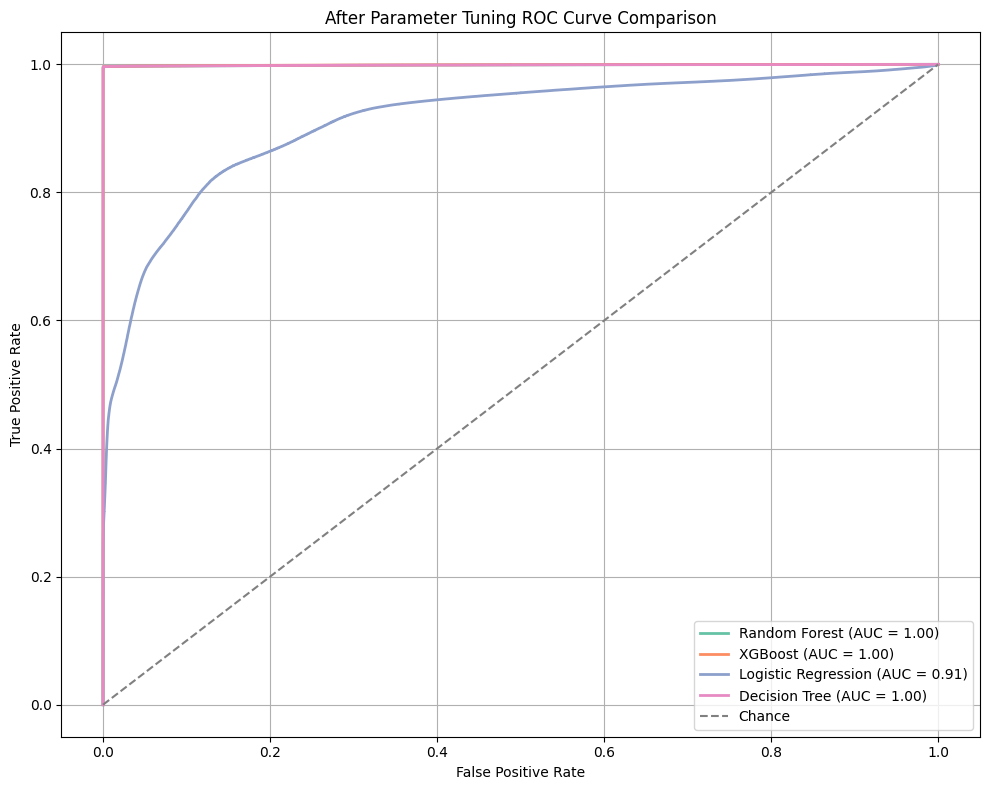

In [ ]:
tuining_model_probs = {
    'Random Forest': y_proba_rf_best,
    'XGBoost': y_proba_xgb_best,
    'Logistic Regression': y_proba_lr_best,
    'Decision Tree': y_proba_dt_best
}

plt.figure(figsize=(10, 8))

for model_name, y_proba in tuining_model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')

plt.title('After Parameter Tuning ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Neural Network

In [ ]:


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor( X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=512)


In [ ]:
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),   # Layer 1: Fully connected
            nn.ReLU(),                   # Activation 1: ReLU
            nn.Dropout(0.3),             # Dropout 1

            nn.Linear(128, 64),          # Layer 2: Fully connected
            nn.ReLU(),                   # Activation 2: ReLU
            nn.Dropout(0.3),             # Dropout 2

            nn.Linear(64, 32),           # Layer 3: Fully connected
            nn.ReLU(),                   # Activation 3: ReLU

            nn.Linear(32, 1),            # Output layer (Binary classification)
            nn.Sigmoid()                 # Activation 4: Sigmoid (for probability output)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN(input_dim=X_train_scaled.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_loss = float('inf')
patience, wait = 3, 0

for epoch in range(20):

    model.train()
    epoch_loss, correct, total = 0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * xb.size(0)
        correct += ((preds > 0.5) == yb).sum().item()
        total += yb.size(0)

    train_loss = epoch_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)


    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
            preds = model(xb)
            loss = criterion(preds, yb)

            val_loss += loss.item() * xb.size(0)
            val_correct += ((preds > 0.5) == yb).sum().item()
            val_total += yb.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1:02d}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered!")
            break


model.load_state_dict(best_model_state)

model.eval()
y_true, y_pred, y_score = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = model(xb).cpu().numpy()
        yb = yb.numpy()
        y_score.extend(preds)
        y_pred.extend((preds > 0.5).astype(int))
        y_true.extend(yb)

print("\nDNN Classification Report  :")
print(classification_report(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_score))



Epoch 01: Train Loss=0.1692, Acc=0.9346 | Val Loss=0.0561, Acc=0.9810
Epoch 02: Train Loss=0.0545, Acc=0.9830 | Val Loss=0.0327, Acc=0.9930
Epoch 03: Train Loss=0.0349, Acc=0.9916 | Val Loss=0.0280, Acc=0.9939
Epoch 04: Train Loss=0.0289, Acc=0.9934 | Val Loss=0.0263, Acc=0.9940
Epoch 05: Train Loss=0.0269, Acc=0.9940 | Val Loss=0.0253, Acc=0.9942
Epoch 06: Train Loss=0.0255, Acc=0.9942 | Val Loss=0.0248, Acc=0.9946
Epoch 07: Train Loss=0.0247, Acc=0.9945 | Val Loss=0.0241, Acc=0.9946
Epoch 08: Train Loss=0.0240, Acc=0.9946 | Val Loss=0.0246, Acc=0.9946
Epoch 09: Train Loss=0.0235, Acc=0.9947 | Val Loss=0.0238, Acc=0.9947
Epoch 10: Train Loss=0.0236, Acc=0.9947 | Val Loss=0.0231, Acc=0.9947
Epoch 11: Train Loss=0.0231, Acc=0.9948 | Val Loss=0.0231, Acc=0.9948
Epoch 12: Train Loss=0.0229, Acc=0.9948 | Val Loss=0.0229, Acc=0.9948
Epoch 13: Train Loss=0.0227, Acc=0.9949 | Val Loss=0.0226, Acc=0.9948
Epoch 14: Train Loss=0.0228, Acc=0.9948 | Val Loss=0.0228, Acc=0.9948
Epoch 15: Train Loss

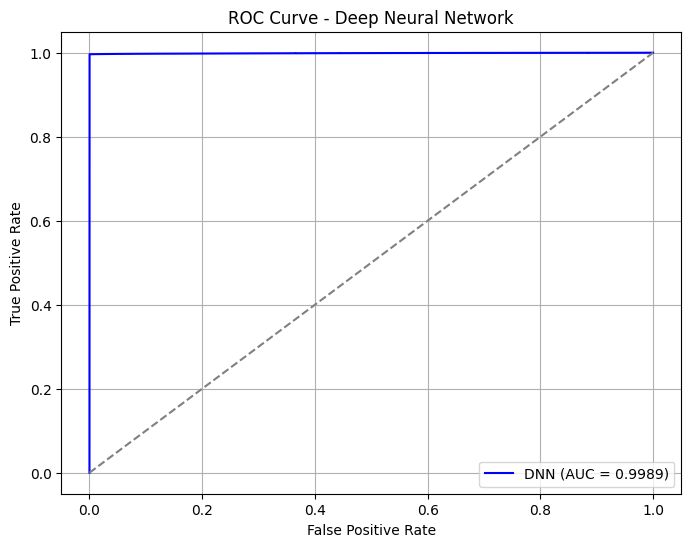

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deep Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

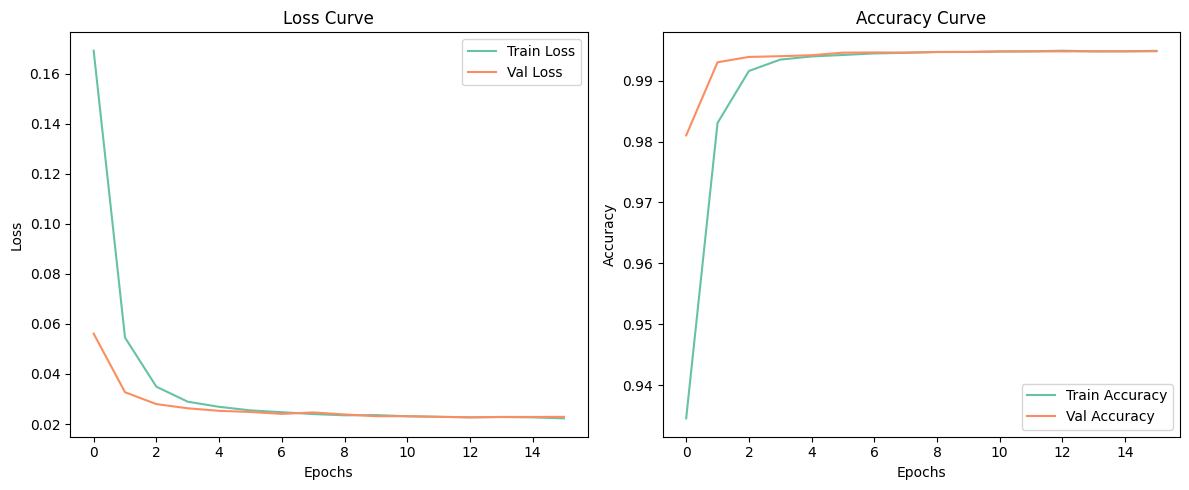

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
